# Week 2: Background subtraction

This python notebook includes all the exercises from this session. All the needed setup, I/O and user-interaction code is already provided to let you concentrate on this week's topic.<br>
Please run all the provided code in order before running yours.<br>


## 1. Bluescreen
### 1.A Single pixel model
Extract foreground objects in bluescreen movie footage. The blue background color should be specified by a single color value [r, g, b]. You may obtain such a value by using the provided notebook widget to select one or more blue pixels on the first frame of the footage. To determine whether a given pixel should be foreground or background, threshold the absolute distance of its value to the reference value, i.e.

$$\left\lVert[r, g, b] - [r_0, g_0, b_0]\right\rVert < t$$

Based on pixelwise decisions, a mask can be created to specify foreground and background.<br>
Try different values for the threshold and the reference color. To test your results, you can use the short video provided. Note that not the whole background consists of bluescreen.
To overcome this problem, you can use the precomputed mask provided into the variable `mask`.

### 1.B Exemplar set model
To further improve the results, specify the blue background by an exemplar set of blue background pixels. You may select this set using the same widget as in the previous point. After computing mean $\mu$ and covariance matrix $\Sigma$ of the pixel values, the Mahalanobis distance $M(x, \mu, \Sigma)$ can be used to decide whether a color value $x$ originated from the background or the foreground.

$$M(x, \mu, \Sigma) = \sqrt{(x-\mu)^T\Sigma^{-1}(x-\mu)}$$

## 2. Per-pixel Model
Probably you have noticed that the approach in the previous task failed in the upper region of the background, which was not covered with blue sheets, for which we provided the `mask`. To handle more complex scenarios, extend the background model to a per-pixel model. For each pixel, compute the mean and the covariance of its values over a number of frames which do not contain foreground objects. You may then use the Mahalanobis distance to classify pixels in sequences containing foreground objects. You can use the same threshold for all pixels.<br>
To create the model, use jugglingBG.avi. This scene was captured for several frames without foreground objects. Based on the background model, foreground pixels can then be identified and masks can be created for jugglingTest.avi.

## Useful information for this tutorial:

Images are represented as numpy arrays, which are fixed-dimensional arrays. Videos are represented as arrays of images.<br>
In this tutorial each pixel takes a RGB value within the range [0-255] and is represented as a 16-bit signed integer, to allow signed operations without subtle overflow bugs.

you will need to visualize your results, thus to printout an image use:

`imshow(image)`

You can read pixel values inside an image by accessing the corresponding pixel coordinates in the array. The following reads the green component (1) of pixel at location (10, 20) of the 5th frame (index 4):

`g = vid[4, 10, 20, 1]`

Of course you can also change pixel values in the same way. We recommend copying an image before editing. To copy an image:

`im_copy = np.array(im)` (`np` is the short name for `numpy` which is recognized by python when importing numpy with `import numpy as np`)

With numpy it is also possible to refer to slices of a given array by specifying the kept dimensions in the slice with `:`. For example, if we want to access the red channel of an RGB image `im` with shape `(height, width, 3)`, we can write `im[:, :, 0]`, which refers to the whole image data for the red channel only. We can optionally specify a range to be kept along a direction by writing the extreme indices around the `:` as in `min:max`. For example, accessing a patch within the pixel coordinates `(h0, w0)`, `(h1, w1)` with h0 < h1 and w0 < w1 can be done with `im[h0:h1, w0:w1, :]`.<br>
You can also index arrays based on conditions: for example to set to black all pixels with a blue component higher than 200 you can write `im[im[:, :, 2] > 200] = 0`.<br>
These references can be used both for reading an image slice and for writing a whole slice at once, without looping over it.

When doing operations between numpy arrays, all operations are executed element-wise (except for the `@` operator that performs the usual matrix multiplication). This requires the shapes (dimensions) of the involved arrays to match or to be compatible according to broadcasting rules, which are usually intuitive. An example of broadcasting is when adding a pixel value `p=np.array([70, 128, 255])` to an image `im` with shape `(height, width, 3)`: the operation is legal and the pixel value is added independently to each pixel in the image. A complete reference of numpy broadcasting rules (not necessary for this tutorial, but very useful for numpy python programming) can be found in https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html . 

In the following we list some useful functions:

`np.array(a)`: returns a copy of `a` as a numpy array. Argument `a` does not need to be a numpy array, it can be any array-like object, e.g. a python list. https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html<br>
`np.empty(shape, dtype)`: returns a new empty array with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html<br>
`np.ones(shape, dtype)`: returns a new array filled with ones with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html<br>
`np.zeros(shape, dtype)`: returns a new array filled with zeros with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html<br>
`np.eye(N)` : builds the identity matrix of order `N`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html<br>
`np.reshape(a, newshape)`: returns a reshaped view of the input array `a` having shape `newshape`, which should be specified as a tuple of integers. https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html<br>
`np.linalg.norm(x)`: returns the L2 norm of array `x`. You can also specify a keyword argument `axis` to compute the norm only along a specific dimension (the result will have the same shape as `x`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html<br>
`np.transpose(a)` : returns the transposed of array `a`, whose shape has reversed order with respect to `a`. Alias `a.T`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html<br>
`np.linalg.inv(a)` : returns the multiplicative inverse of matrix `a`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html<br>
`np.matmul(a, b)` : returns the matrix multiplication of `a` multiplied by `b`. Alias `a @ b`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html<br>
`np.sum(a)` : returns the sum of all the elements of array `a`. You can specify a keyword argument `axis` to compute the sum only along a specific dimension (the result will have the same shape as `a`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html<br>
`np.mean(a)` : returns the mean value of all the elements of array `a`. You can specify a keyword argument `axis` to compute the mean only along a specific dimension (the result will have the same shape as `a`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html<br>
`np.cov(m)` : build the covariance matrix of array `a` where each row represents a variable and each column represents an observation.  https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html <br>



## EXERCISE 1 - SETUP CODE

The following cell installs required packages into the virtual machine that will run your code

In [1]:
!pip install scikit-video
!pip install scikit-image
!pip install ipywidgets

Import packages to read videos, make interactive widgets and plot images.

In [2]:
import skvideo
skvideo.setFFmpegPath('C:/FFmpeg/FFmpeg/bin')
import skvideo.io
import skimage.io
import matplotlib 
from ipywidgets import interactive, widgets
from IPython.display import display
from matplotlib.pyplot import imshow
import numpy as np
import ffmpeg

Reading the test video bluescreen.avi in `bluescreen` and the upper region mask into `umask`.

In [3]:
bluescreen = np.array(skvideo.io.vread("bluescreen.avi"), dtype=np.int16)
numframes, height, width, channels = np.shape(bluescreen)
print("Video information:")
print("Number of frames: ", numframes)
print("Frame width (pixels): ", width)
print("Frame height (pixels): ", height)
print("Video array shape: ", np.shape(bluescreen))

umask = skimage.io.imread("mask.bmp")//255

Video information:
Number of frames:  43
Frame width (pixels):  516
Frame height (pixels):  389
Video array shape:  (43, 389, 516, 3)


Here is a \*wonderful\* user interface we have prepared for you to select any number of points on the first frame of the video.

Use the x slider to move vertically and use the y slider to move horizontally (x and y reflect indexing in the image array).<br>
Press "Update image" when you want to see where you moved your cursor within the image, and press "Remember this point" when you want to store the current selected point into the python list `selected_image_locations`.


`selected_image_locations` will contain all selected locations stored as couples of integers, taking the format: [(x1, y1), (x2, y2), (x3, y3) ...]

The image will show a red cross where there is the current temporary selection, and green crosses on all stored locations.

If you are not familiar with numpy arrays, we suggest to read through the code of `display_selections` and `draw_cross` as further examples.

In [4]:
selected_image_locations = list()

def draw_cross(im, cx, cy, l, w, col):
    dimx, dimy = np.shape(im)[:2]
    im[max(0, cx-l):min(cx+l, dimx-1), max(0, cy-w):min(dimy-1, cy+w)] = col
    im[max(0, cx-w):min(dimx-1, cx+w), max(0, cy-l):min(dimy-1, cy+l)] = col


def display_selections(x, y):
    tmp_im = np.array(bluescreen[0]*umask)
    for px, py in selected_image_locations:
        draw_cross(tmp_im, px, py, 1, 5, (0, 255, 0))
    draw_cross(tmp_im, x, y, 1, 5, (255, 0, 0))
    imshow(tmp_im)
    
interactive_plot = interactive(display_selections,{'manual': True, 'manual_name': 'Update image'}, x=(0, height-1, 1), y=(0, width-1, 1))
button = widgets.Button(description="Remember this point")
xslider = interactive_plot.children[0]
yslider = interactive_plot.children[1]
button.on_click(lambda b: selected_image_locations.append((xslider.value, yslider.value)))
display(button)
display(interactive_plot)
print (selected_image_locations)

Button(description='Remember this point', style=ButtonStyle())

interactive(children=(IntSlider(value=194, description='x', max=388), IntSlider(value=257, description='y', ma…

[]


## EXERCISE 1.A - PUT SOLUTION HERE

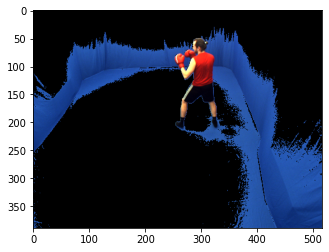

In [6]:
# A few basic code hints this time, just in case it is the very first time you code in Python :)
# of course this is not a template for the 'best' solution, you are encouraged to change everything you want!

# First we take the x and y pixel coordinates of the first selection made at the previous step. 
# Notice that selected_image_location[0] is a tuple of 2 elements, which we can assign to two scalar variables at once. If the dimensions don't match (like assigning a couple to three variables), Python will throw an error
selx, sely = (xslider.value, yslider.value)

# get the [r0, g0, b0] values that model our background in this simple single-pixel model
ref_rgb = bluescreen[0, selx, sely] #Find for the first frame and pixel location the RGB value

# set a threshold, you can tune it experimentally after seeing the results
THRESHOLD = 100

# initialize the background mask, it will need to be a 0-1 array of the same sizes of our video frames, so that each 0-1 value corresponds to a pixel being assigned to class background (0) or foreground (1)
bgmask = np.array(umask) #umask is the mask defined 2 cells before 

# now classify each pixel according to the single-pixel model
'''
for h in range(height):
    for w in range(width):
        if np.linalg.norm(bluescreen[0] - ref_rgb)<THRESHOLD:    #In absolute distance
            bgmask[h, w] = 0    # Below threshold=>Too similar to background
'''
# alternatively you can also do it with one line of code using conditional indexing:
# Boolean mask for indizes, we set all background to black
bgmask[np.linalg.norm(bluescreen[0] - ref_rgb, axis=-1) < THRESHOLD] = 0

# and visualize your results on the first frame. Do they look reasonable?
imshow(bluescreen[0]*bgmask)   

## EXERCISE 1.B - PUT SOLUTION HERE

[[ 24  61 132]
 [ 82 152 254]
 [ 82 152 254]
 [ 39  91 185]
 [ 61 131 228]
 [ 33  77 166]
 [ 31  69 146]]


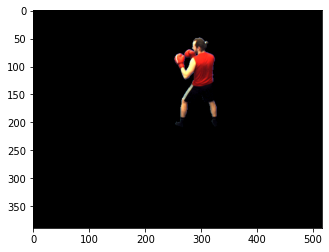

In [16]:
# Use this time the Mahalanobis distance for the thresholding, with a global mean 
# and covariance of the background

exemplar_pixel_set = np.array([bluescreen[0, selx, sely] for selx, sely in selected_image_locations])  
print(exemplar_pixel_set)
# the [`expression` for `element` in `iterator`] list constructor 
#is just an equivalent pythonic short-hand for a for-loop
mu = np.mean(exemplar_pixel_set, axis=0)
inv_cov = np.linalg.inv(np.cov(exemplar_pixel_set.T))

THRESHOLD = 10

def detect_bg_mahalanobis(i):
    
    #Compute the background mask using the Mahalanobis distance.
    bgmask = np.array(umask)
    
    for h in range(height):
        for w in range(width):
            residual = bluescreen[i, h, w]-mu
            if residual.T @ inv_cov @ residual < THRESHOLD**2:
                bgmask[h, w] = 0

    return bgmask

#Now the Picture with Mahalabonis
imshow(bluescreen[0]*detect_bg_mahalabonis(0)) 

In [19]:
# The whole rocording
play = widgets.Play(
    interval=1000,
    min=0,
    max=numframes-1,
    step=1,
)

def print_frame(i):
    imshow(bluescreen[i]*detect_bg_mahalanobis(i))
    
slider = interactive(print_frame, i=(0, numframes-1, 1))
widgets.jslink((play, 'value'), (slider.children[0], 'value'))
widgets.VBox([play, slider])

## EXERCISE 2 - SETUP CODE
(installs and imports from the Exercise 1 should be run anyway)

Reading the test video jugglingTest.avi in `testvid` and the background reference video jugglingBG.avi into `bgvid`.

In [21]:
#Just the background
bgvid = np.array(skvideo.io.vread("jugglingBG.avi"), dtype=np.int16)
# Actual vid
testvid = np.array(skvideo.io.vread("jugglingTest.avi"), dtype=np.int16)

bgnumframes, bgheight, bgwidth, bgchannels = np.shape(bgvid)
print("jugglingBG.avi video information:")
print("Number of frames: ", bgnumframes)
print("Frame width (pixels): ", bgwidth)
print("Frame height (pixels): ", bgheight)
print("Video array shape: ", np.shape(bgvid))

print()
testnumframes, testheight, testwidth, testchannels = np.shape(testvid)
print("jugglingTest.avi video information:")
print("Number of frames: ", testnumframes)
print("Frame width (pixels): ", testwidth)
print("Frame height (pixels): ", testheight)
print("Video array shape: ", np.shape(testvid))

jugglingBG.avi video information:
Number of frames:  20
Frame width (pixels):  672
Frame height (pixels):  378
Video array shape:  (20, 378, 672, 3)

jugglingTest.avi video information:
Number of frames:  100
Frame width (pixels):  672
Frame height (pixels):  378
Video array shape:  (100, 378, 672, 3)


## EXERCISE 2 - PUT SOLUTION HERE

In [22]:
# Use again the Mahalanobis distance for the thresholding, but with a per-pixel mean and covariance
mean = np.mean(bgvid, axis=0) # mean value for each pixel by averaging over all frames
inv_cov_matrices = np.empty((bgheight, bgwidth, 3, 3)) #For each pixel

###
progress_bar = widgets.IntProgress(min=0.0, max=bgwidth, description='')
display(progress_bar)
###
for w in range(bgwidth):
    for h in range(bgheight):
        inv_cov_matrices[h, w] = np.linalg.inv(np.cov(bgvid[:, h, w, :].T) + 1e-8*np.eye(3))
        # np.eye for onees on the diagonal and zero elsewhere
    ###
    progress_bar.value += 1
    ###
  

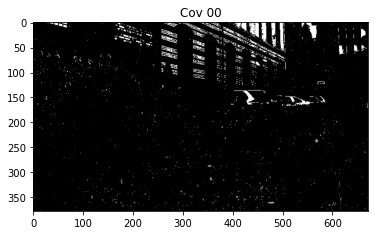

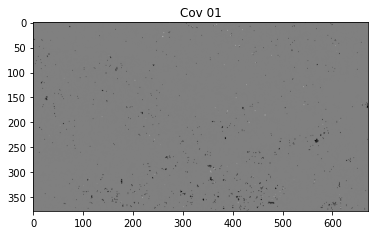

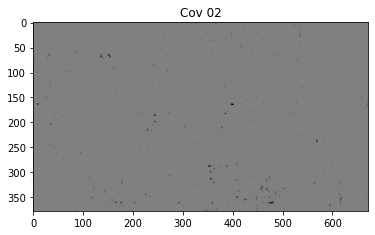

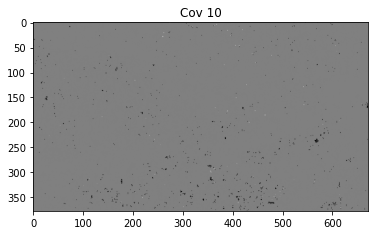

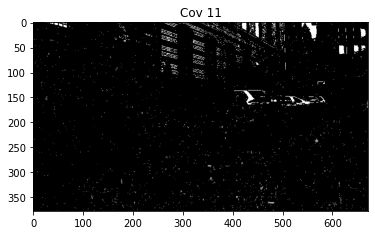

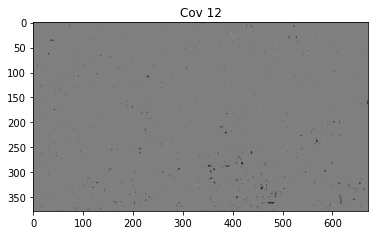

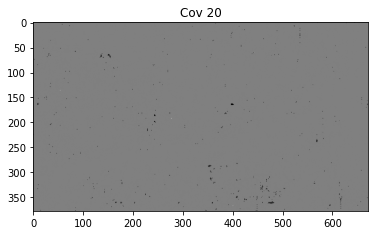

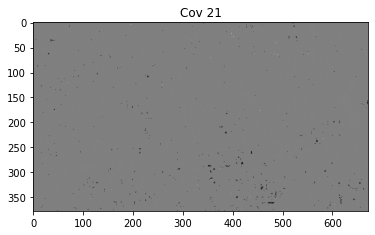

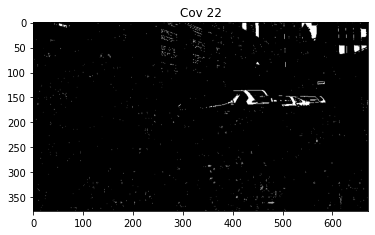

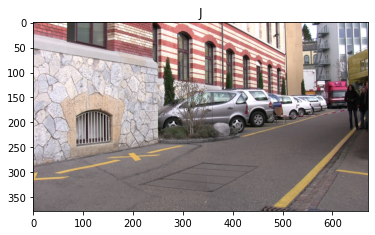

In [66]:
for i in range(3):
    for j in range(3):
        plt.title("Cov "+str(i)+str(j))
        plt.imshow(inv_cov_matrices[:,:,i,j], cmap="gray")
        plt.show()
plt.title("J")
plt.imshow(bgvid[0].squeeze(), cmap="gray")
plt.show()

[[[0.77607843 0.47745098 0.51392157]
  [0.7554902  0.47588235 0.5054902 ]
  [0.75098039 0.4654902  0.49431373]
  ...
  [0.28058824 0.30176471 0.33254902]
  [0.36117647 0.41882353 0.40235294]
  [0.60882353 0.63137255 0.61882353]]

 [[0.53784314 0.33921569 0.35352941]
  [0.60666667 0.40313725 0.41901961]
  [0.69686275 0.46784314 0.49529412]
  ...
  [0.44921569 0.48843137 0.53745098]
  [0.57098039 0.66705882 0.63882353]
  [0.97784314 1.         0.99901961]]

 [[0.40490196 0.22215686 0.23117647]
  [0.36862745 0.1845098  0.1972549 ]
  [0.38098039 0.2        0.21823529]
  ...
  [0.41862745 0.46156863 0.51019608]
  [0.52294118 0.61843137 0.59431373]
  [0.90627451 0.95490196 0.93705882]]

 ...

 [[0.40960784 0.3745098  0.38803922]
  [0.41764706 0.38313725 0.39647059]
  [0.43313725 0.39823529 0.40882353]
  ...
  [0.39686275 0.37313725 0.38176471]
  [0.39784314 0.37294118 0.3827451 ]
  [0.44960784 0.42607843 0.43470588]]

 [[0.39352941 0.35941176 0.37411765]
  [0.41176471 0.38078431 0.39313725]


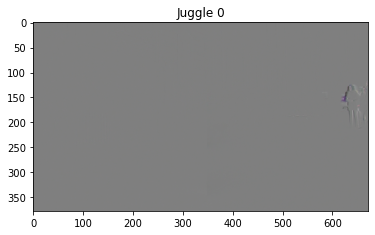

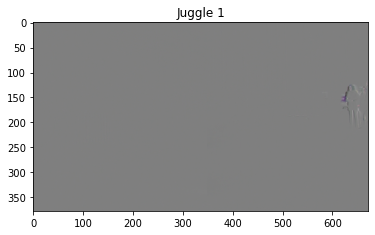

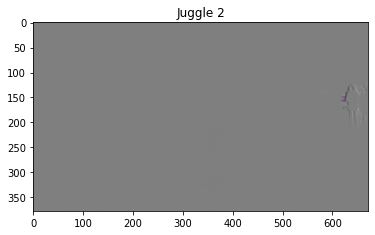

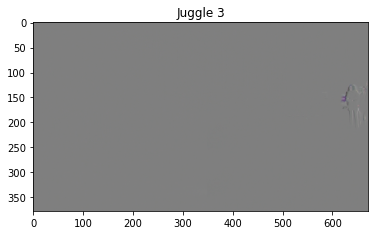

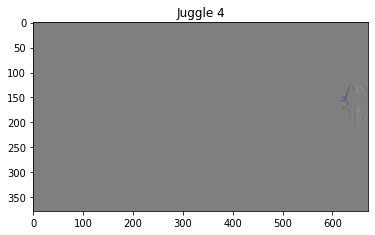

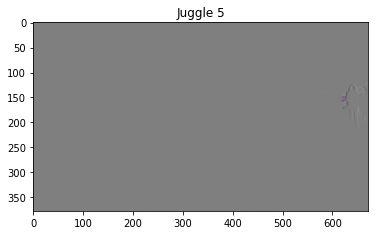

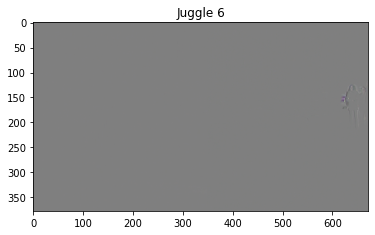

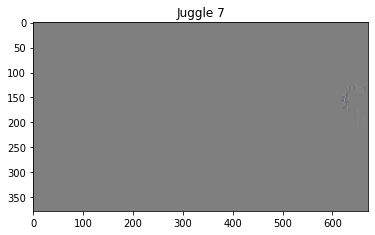

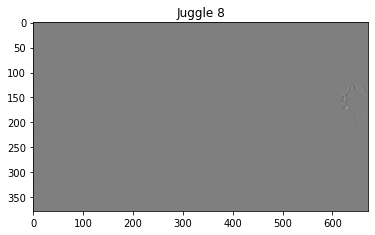

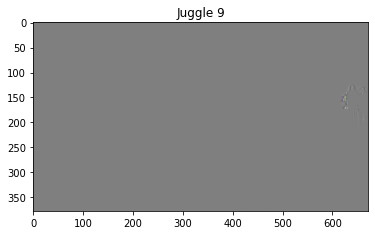

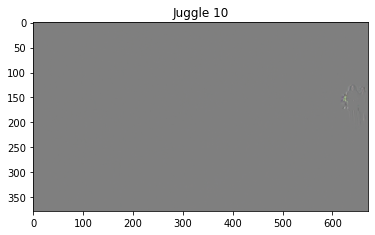

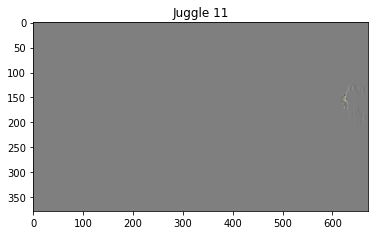

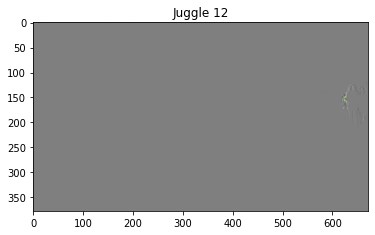

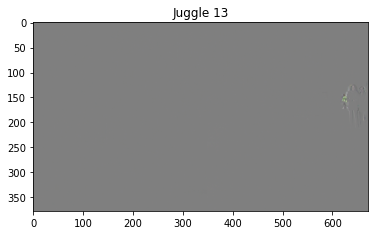

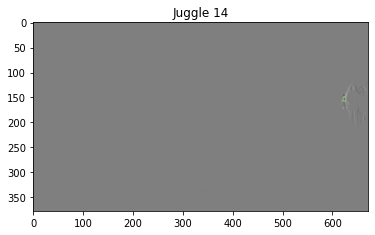

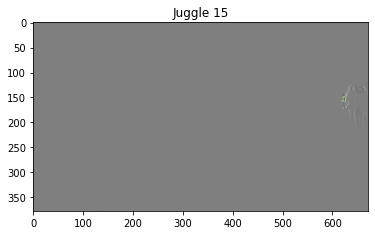

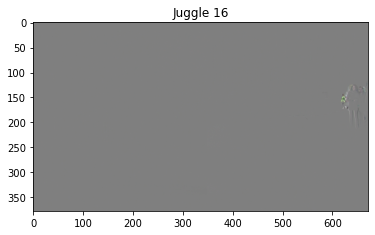

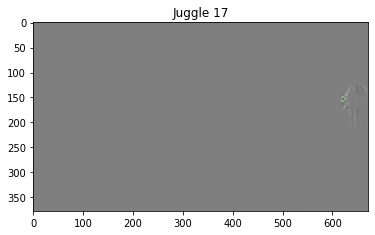

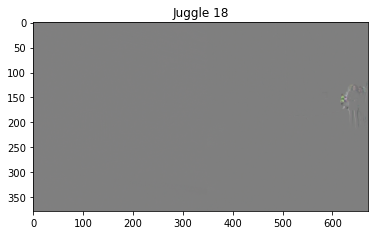

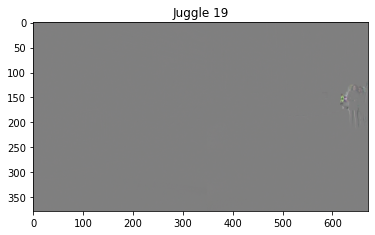

In [59]:
import matplotlib.pyplot as plt

mean_pic=mean/255
print(mean_pic)
for i in range(20):
    diff=bgvid[i]-mean
    diff_pic=diff/255
    diff_pic=(diff_pic+1)/2
    plt.title("Juggle "+str(i))
    plt.imshow((diff_pic).squeeze(), cmap="gray")
    plt.show()


In [24]:
THRESHOLD = 80
        
def detect_bg_per_pixel_model(i):
    # Compute the background mask using the Mahalanobis distance.
    bgmask = np.ones(shape=(testheight, testwidth, 1), dtype=np.int16)
    
    for h in range(testheight):
        for w in range(testwidth):
            residual = testvid[i, h, w]-mean[h, w]
            if residual.T @ inv_cov_matrices[h, w] @ residual < THRESHOLD**2:
                bgmask[h, w] = 0

    return bgmask

play = widgets.Play(
    interval=400,
    min=0,
    max=testnumframes-1,
    step=1,
)
    
#def print_frame(i):
#    imshow(bgvid[i])

def print_frame(i):
    imshow(testvid[i]*detect_bg_per_pixel_model(i))

#For each frame new picture
slider = interactive(print_frame, i=(0, testnumframes-1, 1))
widgets.jslink((play, 'value'), (slider.children[0], 'value'))
widgets.VBox([play, slider])    

## Credits

Luca Cavalli (lcavalli@ethz.ch)